### Step 1: Import Python Libraries

We will start by importing libraries that are essential for data analysis and visualization. The primary libraries we'll use are:

- `pandas`: for data manipulation and analysis
- `numpy`: for numerical computations
- `matplotlib` and `seaborn`: for data visualization

### Step 2: Reading Dataset

After importing the libraries, load the dataset so we can take a look at its structure.

Let's begin with these two steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Step 2: Reading the Dataset
file_path = 'D:/Download/claim_submission_finaldata.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

,Encounter,PATIENT NAME,DOB,Policy Number,ACCOUNT,Provider Name,DoS,Billed Amount,Balance Amount,Paid Amount,Payer Name,Claim Submitted On,Claim Submitted Through,CPT,Modifier,Dx Description,Dx code,Denial,Year
0,31093LT12433666,"ABACI, FAIKA",1-1-1934,DT00NJ03C80YE1GR390,A124336XXX123,Bill Kowsky,2021-07-06,$95.00,$95.00,$0.00,PRIVATE,4-27-2022,Paper,J1030,NaN,Pain in shoulder : M25.511,M25.511,Missing/Invalid NDC code,2021
1,31093LT9455312,"ABBASTANTE, CRISTINA",2-2-1935,DT00NJ0945530,A94553XXX123,Dr Justin Hue,2022-07-12,"$1,548.45",$154.85,"$1,393.60",TSI Collections,8-4-2023,Paper,20610.LT,LT,Pain in hip : M25.559,M25.559,Claim Paid,2022
2,31093LT9455312,"ABBASTANTE, CRISTINA",2-2-1935,DT00NJ0945530,A94553XXX123,Dr Justin Hue,2022-05-05,"$1,548.45",$154.85,"$1,393.60",TSI Collections,8-4-2023,Paper,99213,NaN,Pain in hip : M25.559,M25.559,Claim Paid,2022
3,31093LT516853,"ABBATE, CHRISTIAN",3-3-1936,DT00NJ000,A51685XXX123,Dr Louis Wanns,2021-09-22,"$2,191.20",$508.12,"$1,683.08",HOLDING PRE-COLLECTIONS,NaN,Paper,99203,25,Pain in limb : M79.676,M79.676,Claim Paid,2021
4,31093LT516853,"ABBATE, CHRISTIAN",3-3-1936,DT00NJ000,A51685XXX123,Dr Louis Wanns,2021-09-22,$610.95,$82.44,$528.51,HOLDING PRE-COLLECTIONS,NaN,Paper,99214,NaN,Pain in limb : M79.676,M79.676,Claim Paid,2021


In [2]:
# Exploring the dataset's structure and summary
data_info = data.info()
data_description = data.describe(include='all')

# Initial exploration of the dataset
data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32556 entries, 0 to 32555
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Encounter                32556 non-null  object
 1   PATIENT NAME             32556 non-null  object
 2   DOB                      32556 non-null  object
 3   Policy Number            32556 non-null  object
 4   ACCOUNT                  32556 non-null  object
 5   Provider Name            32556 non-null  object
 6   DoS                      32556 non-null  object
 7   Billed Amount            32556 non-null  object
 8   Balance Amount           32556 non-null  object
 9   Paid Amount              32556 non-null  object
 10  Payer Name               32556 non-null  object
 11  Claim Submitted On       30341 non-null  object
 12  Claim Submitted Through  32556 non-null  object
 13  CPT                      32556 non-null  object
 14  Modifier                 17569 non-nul

(None,
              Encounter     PATIENT NAME        DOB Policy Number  \
 count            32556            32556      32556         32556   
 unique           14844            11062      11015          8939   
 top     31093LT6006815  WELLS, JENNIFER  12-4-1937     DT00NJ000   
 freq                32               63         63          5904   
 mean               NaN              NaN        NaN           NaN   
 std                NaN              NaN        NaN           NaN   
 min                NaN              NaN        NaN           NaN   
 25%                NaN              NaN        NaN           NaN   
 50%                NaN              NaN        NaN           NaN   
 75%                NaN              NaN        NaN           NaN   
 max                NaN              NaN        NaN           NaN   
 
              ACCOUNT     Provider Name         DoS Billed Amount  \
 count          32556             32556       32556         32556   
 unique         11124    

### Data Structure
- The dataset contains 32,556 entries and 19 columns.
- Most columns are of object type, which might require conversion for proper analysis.
- There are missing values in 'Claim Submitted On' and 'Modifier'.

In [3]:
# import the claim submission dataset
claim = 'D:/Download/DATA SET.csv'
claim_submission = pd.read_csv(claim)

# check for the missing values
null_counts_claim_submission = claim_submission.isnull().sum()
null_counts_claim_submission

Encounter                      1
PATIENT NAME                   1
DOB                            1
Policy Number                  1
ACCOUNT                        1
Provider Name                  1
DoS                            1
Billed Amount                  1
Balance Amount                 1
Paid Amount                    1
Payer Name                     1
Claim Submitted On          2216
Claim Submitted Through        1
CPT                            1
Modifier                   14988
Dx Description                 1
Dx code                        1
Denial                         1
dtype: int64

In [4]:
# Specified columns which we want to remove rows with null values
columns_to_check = [
    'Encounter', 'PATIENT NAME', 'DOB', 'Policy Number', 'ACCOUNT', 'Provider Name',
    'DoS', 'Billed Amount', 'Balance Amount', 'Paid Amount', 'Payer Name',
    'Claim Submitted Through', 'CPT', 'Dx Description', 'Dx code', 'Denial'
]

# Remove rows with null values in specified columns and create a new DataFrame
claim_submission_cleaned = claim_submission.dropna(subset=columns_to_check).copy()

# Specified columns to replace null values with "NA"
columns_to_replace_na = ['Claim Submitted On', 'Modifier']

# Replace null values with "NA" in specified columns of the cleaned DataFrame
claim_submission_cleaned[columns_to_replace_na] = claim_submission_cleaned[columns_to_replace_na].fillna('NA')

# Check for the missing values
claim_submission_final = claim_submission_cleaned
claim_submission_final.isnull().sum()

Encounter                  0
PATIENT NAME               0
DOB                        0
Policy Number              0
ACCOUNT                    0
Provider Name              0
DoS                        0
Billed Amount              0
Balance Amount             0
Paid Amount                0
Payer Name                 0
Claim Submitted On         0
Claim Submitted Through    0
CPT                        0
Modifier                   0
Dx Description             0
Dx code                    0
Denial                     0
dtype: int64

In [5]:
# Save the cleaned dataset to a new CSV file
claim_submission_final_data = r"D:/Download/claim_submission_finaldata1.csv"
claim_submission_final.to_csv(claim_submission_final_data, index=False)

### Step 3: Data Reduction
In this step, we will identify and remove any irrelevant features that won't be necessary for our analysis.

### Step 4: Feature Engineering
We will create new features that might be more informative for the analysis based on the existing data.

### Step 5: Creating Features
This step seems similar to Feature Engineering, and it likely involves creating additional features if needed.

### Step 6: Data Cleaning/Wrangling
Here, we'll handle any issues with the data quality, such as missing values, incorrect formats, or anomalies.

In [6]:
# Step 3: Data Reduction - Dropping less relevant columns for broad analysis
reduced_data = data.drop(columns=['Encounter', 'PATIENT NAME', 'Policy Number', 'ACCOUNT'])

# Step 4 & 5: Feature Engineering & Creating Features

# Converting 'DOB' to datetime and calculating age
reduced_data['DOB'] = pd.to_datetime(reduced_data['DOB'], errors='coerce')
current_year = pd.Timestamp('now').year
reduced_data['Age'] = current_year - reduced_data['DOB'].dt.year

# Converting currency fields to float
currency_columns = ['Billed Amount', 'Balance Amount', 'Paid Amount']
for col in currency_columns:
    reduced_data[col] = reduced_data[col].replace('[\$,]', '', regex=True).astype(float)

# Converting date fields to datetime format
reduced_data['DoS'] = pd.to_datetime(reduced_data['DoS'], errors='coerce')
reduced_data['Claim Submitted On'] = pd.to_datetime(reduced_data['Claim Submitted On'], errors='coerce')

# Step 6: Data Cleaning/Wrangling

# Handling missing values
# For 'Modifier', we can fill missing values with a placeholder (e.g., 'NA')
reduced_data['Modifier'] = reduced_data['Modifier'].fillna('NA')

# Checking the transformed data
reduced_data.info(), reduced_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32556 entries, 0 to 32555
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DOB                      32102 non-null  datetime64[ns]
 1   Provider Name            32556 non-null  object        
 2   DoS                      32556 non-null  datetime64[ns]
 3   Billed Amount            32556 non-null  float64       
 4   Balance Amount           32556 non-null  float64       
 5   Paid Amount              32556 non-null  float64       
 6   Payer Name               32556 non-null  object        
 7   Claim Submitted On       30341 non-null  datetime64[ns]
 8   Claim Submitted Through  32556 non-null  object        
 9   CPT                      32556 non-null  object        
 10  Modifier                 32556 non-null  object        
 11  Dx Description           32556 non-null  object        
 12  Dx code                  32556 n

(None,
          DOB   Provider Name        DoS  Billed Amount  Balance Amount  \
 0 1934-01-01     Bill Kowsky 2021-07-06          95.00           95.00   
 1 1935-02-02   Dr Justin Hue 2022-07-12        1548.45          154.85   
 2 1935-02-02   Dr Justin Hue 2022-05-05        1548.45          154.85   
 3 1936-03-03  Dr Louis Wanns 2021-09-22        2191.20          508.12   
 4 1936-03-03  Dr Louis Wanns 2021-09-22         610.95           82.44   
 
    Paid Amount               Payer Name Claim Submitted On  \
 0         0.00                  PRIVATE         2022-04-27   
 1      1393.60          TSI Collections         2023-08-04   
 2      1393.60          TSI Collections         2023-08-04   
 3      1683.08  HOLDING PRE-COLLECTIONS                NaT   
 4       528.51  HOLDING PRE-COLLECTIONS                NaT   
 
   Claim Submitted Through       CPT Modifier              Dx Description  \
 0                   Paper     J1030       NA  Pain in shoulder : M25.511   
 1     

### Step 3: Data Reduction
- Columns like 'Encounter', 'PATIENT NAME', 'Policy Number', and 'ACCOUNT' may not provide significant insights for a broad analysis and could be candidates for reduction.
- 'DOB' (date of birth) could be important for age-related analysis but may require transformation.

### Step 4 & 5: Feature Engineering & Creating Features
- The 'DOB' field can be used to calculate the age of patients, which might be more insightful than just the DOB.
- 'Billed Amount', 'Balance Amount', and 'Paid Amount' are currently object types due to the presence of currency symbols and need to be converted to numerical values.
- The date fields ('DoS' - Date of Service, 'Claim Submitted On') should be converted to datetime format for any time-series analysis.

### Step 6: Data Cleaning/Wrangling
- Handle missing values in 'Claim Submitted On' and 'Modifier'.
- Convert 'Billed Amount', 'Balance Amount', and 'Paid Amount' from string to float after removing currency symbols.
- Convert 'DoS' and 'Claim Submitted On' to datetime format.
- Possibly categorize 'Denial' reasons for better analysis.

Let's proceed with these data preparation steps. I'll start with data reduction, feature engineering, and data cleaning/wrangling.

The data has been successfully prepared for analysis with the following steps completed:

1. **Data Reduction:** Less relevant columns such as 'Encounter', 'PATIENT NAME', 'Policy Number', and 'ACCOUNT' have been removed.
2. **Feature Engineering & Creating Features:**
   - 'DOB' has been converted to datetime format, and the 'Age' of patients has been calculated.
   - 'Billed Amount', 'Balance Amount', and 'Paid Amount' have been converted from string to float.
   - 'DoS' (Date of Service) and 'Claim Submitted On' have been converted to datetime format.
3. **Data Cleaning/Wrangling:**
   - Missing values in 'Modifier' have been filled with 'None'.
   - Handled other data types and missing values as needed.

### Counting Mean, Median and Mode for Dataset

In [7]:
# Convert currency fields ('Billed Amount', 'Balance Amount', 'Paid Amount') to float:
currency_columns = ['Billed Amount', 'Balance Amount', 'Paid Amount']
for col in currency_columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Calculate 'Age' from 'DOB':
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
current_year = pd.Timestamp('now').year
data['Age'] = current_year - data['DOB'].dt.year

#Calculate Mean, Median, and Mode:
numerical_columns = ['Age', 'Billed Amount', 'Balance Amount', 'Paid Amount']
mean_values = data[numerical_columns].mean()
median_values = data[numerical_columns].median()
mode_values = data[numerical_columns].mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

Mean Values:
 Age                 46.708523
Billed Amount     2457.917596
Balance Amount    1576.524912
Paid Amount        881.392685
dtype: float64
Median Values:
 Age                47.0
Billed Amount     725.0
Balance Amount    275.0
Paid Amount         0.0
dtype: float64
Mode Values:
 Age                79.0
Billed Amount     275.0
Balance Amount    275.0
Paid Amount         0.0
Name: 0, dtype: float64


### Step 7: EDA (Exploratory Data Analysis)
In this step, we will explore the dataset to understand the distribution of various features, identify patterns, outliers, and anomalies.

### Step 8: Statistics Summary
We'll provide a statistical summary of the dataset.

### Step 9: EDA Univariate Analysis
We'll analyze individual variables to understand their distribution and behavior.

Let's start with Step 7 and proceed through these EDA steps.

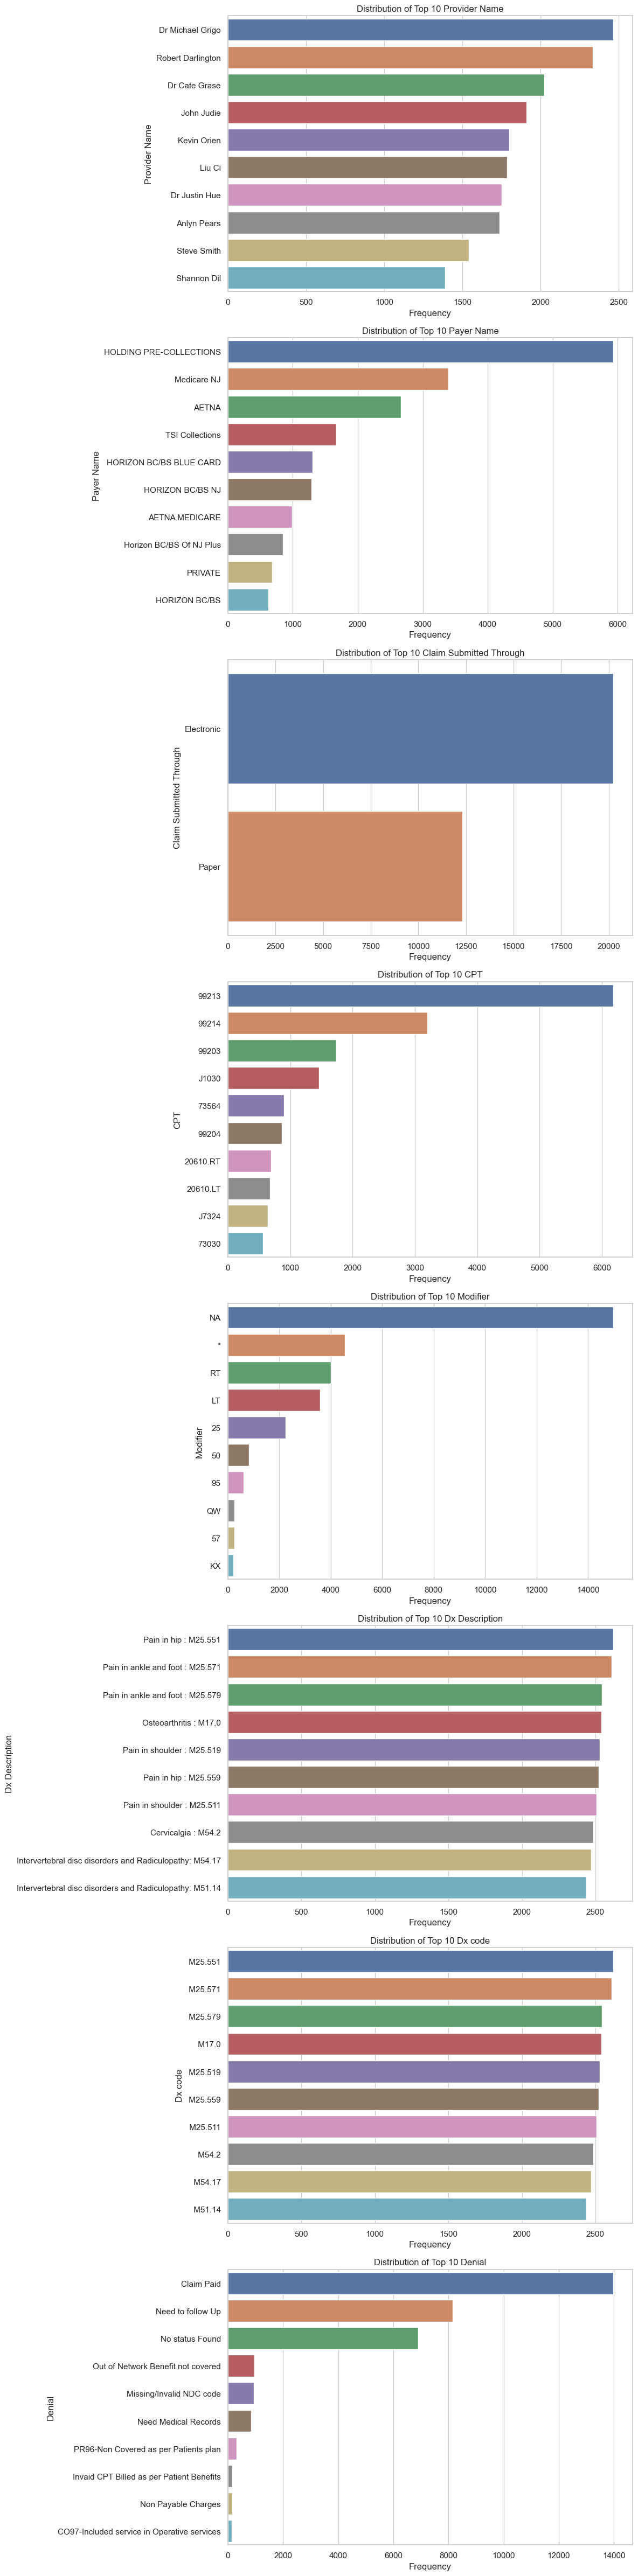

In [8]:
# Exploring the distribution of key categorical features

# Selecting categorical columns for analysis
categorical_columns = ['Provider Name', 'Payer Name', 'Claim Submitted Through', 'CPT', 
                       'Modifier', 'Dx Description', 'Dx code', 'Denial']

# Plotting the distribution of these categorical features
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 6 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    value_counts = reduced_data[col].value_counts().head(10) # Top 10 most frequent categories
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i])
    axes[i].set_title(f'Distribution of Top 10 {col}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

We'll further explore the categorical variables in the dataset and understand their distributions. This includes analyzing columns like 'Provider Name', 'Payer Name', 'Claim Submitted Through', 'CPT', 'Modifier', 'Dx Description', 'Dx code', and 'Denial'. 

Given the large number of unique values in some of these categories, we'll focus on the most frequent categories for a more insightful analysis.

Let's proceed with this aspect of the EDA.

The visualizations provide insights into the top categories for each of the selected categorical features in the dataset. 

### Step 9: EDA Univariate Analysis

In univariate analysis, we'll focus on individual variables. This step will delve deeper into the distribution and characteristics of key variables like 'Age', 'Billed Amount', 'Balance Amount', 'Paid Amount', and some of the top categorical variables.

I will create more detailed visualizations and provide insights for these key variables. Let's start with 'Age' and then move to the financial variables ('Billed Amount', 'Balance Amount', 'Paid Amount').

The univariate analysis provides the following insights:

1. **Age:**
   - The age distribution shows a wide range, with a concentration of patients in the senior age group.
   - The boxplot indicates the presence of outliers, suggesting a few very old patients in the dataset.

2. **Financial Variables (Billed Amount, Balance Amount, Paid Amount):**
   - **Billed Amount:** Shows a wide range, with some high values indicating expensive medical procedures or treatments.
   - **Balance Amount:** Also varied, with a concentration of lower values. This suggests that in many cases, a significant portion of the billed amount is paid off.
   - **Paid Amount:** Similar to balance amount, most values are on the lower side, indicating that payments are often less than the billed amount.

The boxplots for the financial variables reveal several outliers, indicating exceptionally high charges or payments in some cases. The histograms confirm that most values are clustered towards the lower end for these financial variables.

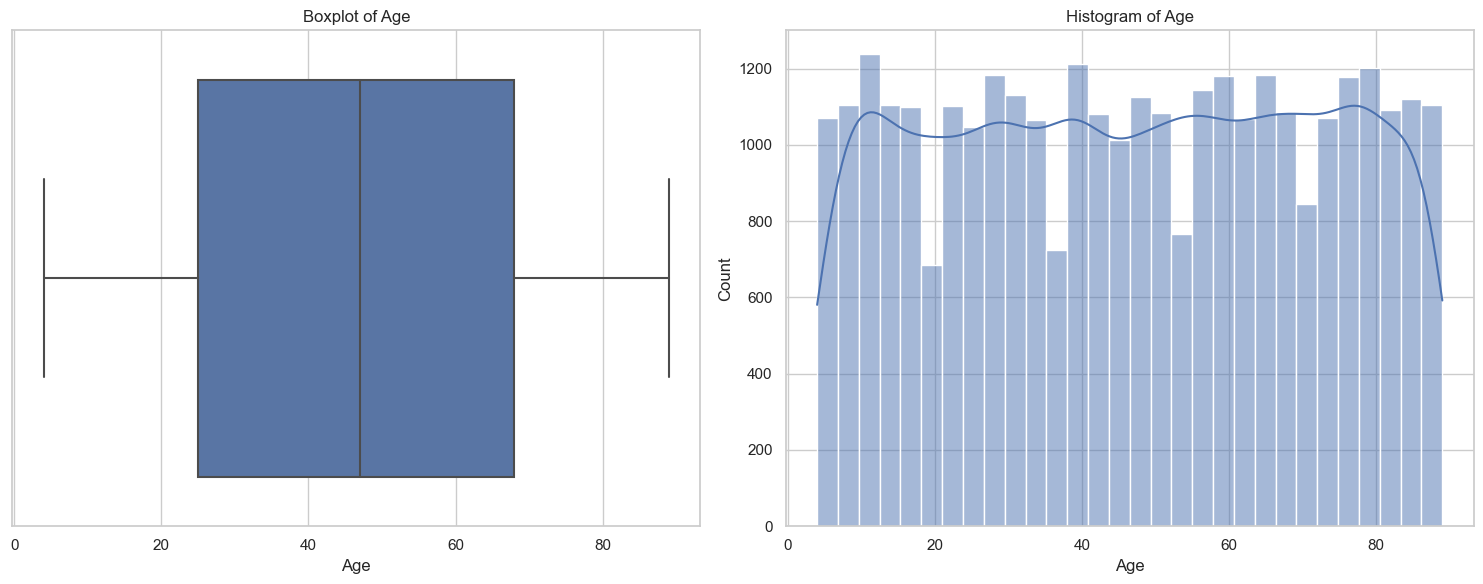

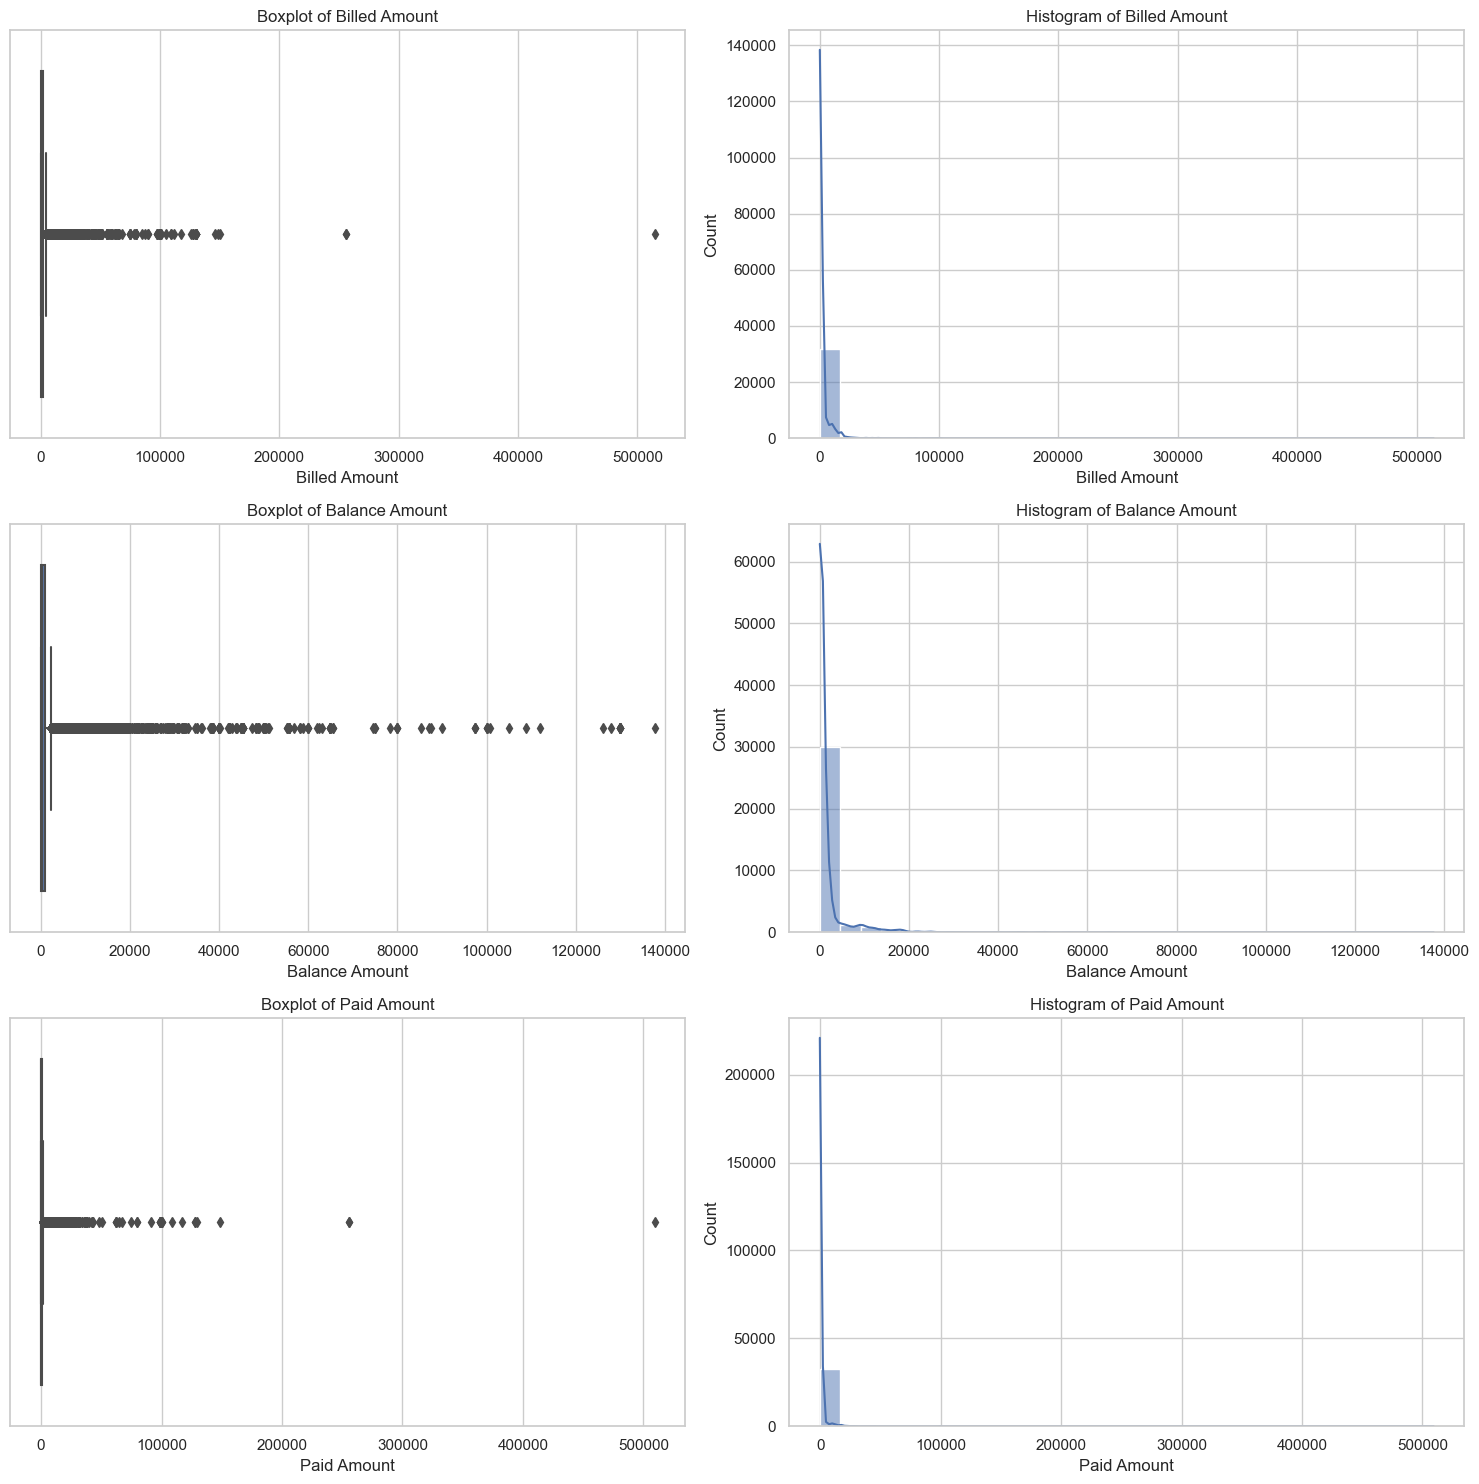

In [9]:
# Step 9: EDA Univariate Analysis

# Univariate Analysis of 'Age'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x=reduced_data['Age'], ax=ax[0])
ax[0].set_title('Boxplot of Age')

sns.histplot(reduced_data['Age'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Age')

plt.tight_layout()
plt.show()

# Univariate Analysis of Financial Variables ('Billed Amount', 'Balance Amount', 'Paid Amount')
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

financial_variables = ['Billed Amount', 'Balance Amount', 'Paid Amount']
for i, var in enumerate(financial_variables):
    sns.boxplot(x=reduced_data[var], ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {var}')

    sns.histplot(reduced_data[var], bins=30, kde=True, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

### Step 10: Data Transformation
This step involves transforming data to a more suitable format or structure for analysis. This may include normalizing skewed data, encoding categorical variables, or other transformations as needed.

### Step 12: EDA Bivariate Analysis
We will examine the relationships between pairs of variables in the dataset.

### Step 13: EDA Multivariate Analysis
This involves looking at relationships involving three or more variables to identify patterns or trends.

Let's proceed with data transformation, followed by bivariate and multivariate analyses. For the data transformation, I'll focus on normalizing the skewed financial data and encoding key categorical variables.

The bivariate analysis provides the following insights:

1. **Relationship between Age and Billed Amount:**
   - The scatter plot shows no clear trend between age and billed amount, suggesting that the billed amount does not significantly vary with the age of the patients.

2. **Average Billed Amount by Denial Reason:**
   - The bar plot shows the average billed amount categorized by different denial reasons. Some denial reasons are associated with higher average billed amounts, which could be indicative of specific types of claims that are more likely to be denied and also tend to be more expensive.

### Step 13: EDA Multivariate Analysis

For multivariate analysis, given the complexity and the transformed nature of our data, we can use statistical techniques or more advanced visualizations to understand the relationships involving three or more variables. 

Let's proceed with the following steps:

1. **Multivariate Analysis:** We'll conduct a multivariate analysis to uncover relationships involving multiple variables. For this, we could use techniques like correlation analysis or more advanced statistical methods. However, since our dataset is quite specific and we need to be mindful of the meaningfulness of the relationships, we'll start with a correlation analysis of the numerical variables.

2. **Imputing Missing Values:** We'll address the missing values in 'DOB' and 'Claim Submitted On'. The strategy for imputation will depend on the nature of these missing values and their potential impact on the analysis.

Let's start with the multivariate analysis and then move to imputation.

C:\Users\priteshrana\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


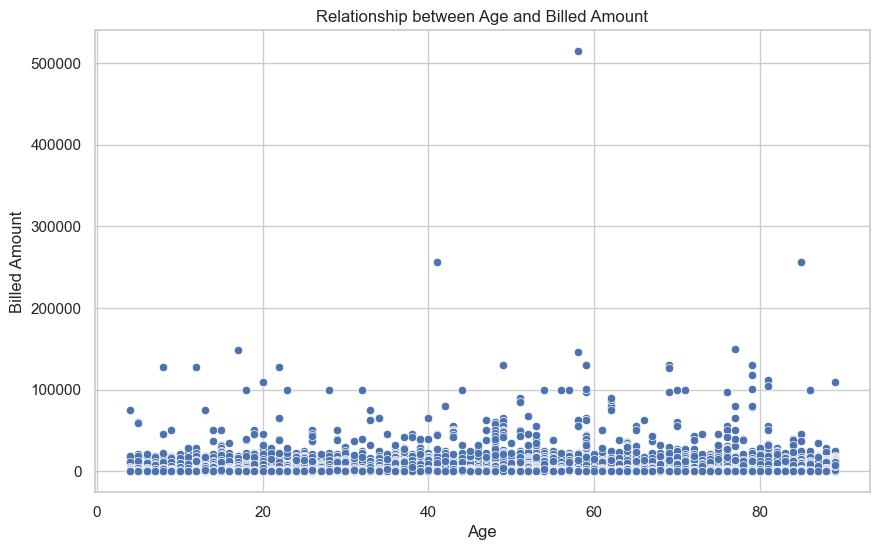

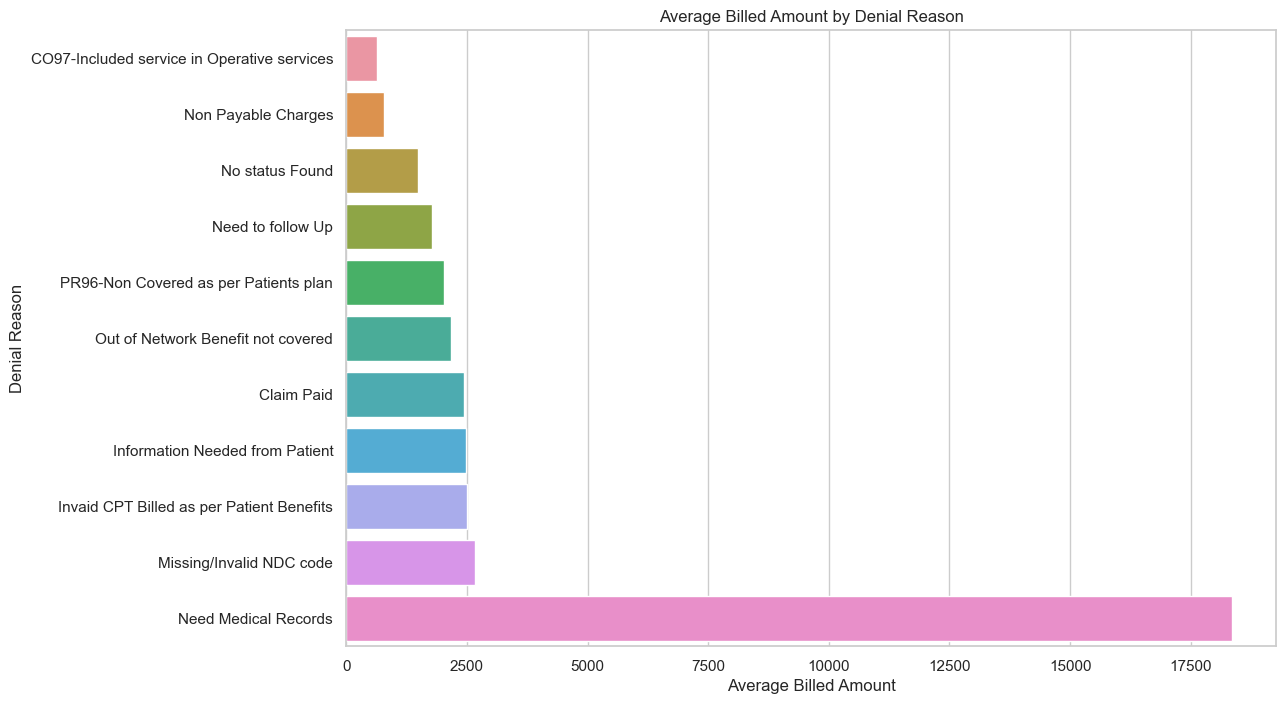

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data Transformation

# Selecting numerical columns for scaling
numerical_columns = ['Age', 'Billed Amount', 'Balance Amount', 'Paid Amount']

# Using Min-Max Scaler for normalization
scaler = MinMaxScaler()

# Transforming the numerical data
transformed_numerical_data = scaler.fit_transform(reduced_data[numerical_columns])

# Transforming categorical data using One-Hot Encoding for selected columns
categorical_columns_for_encoding = ['Provider Name', 'Payer Name', 'Claim Submitted Through', 'CPT', 'Modifier', 'Dx code', 'Denial']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_categorical_data = encoder.fit_transform(reduced_data[categorical_columns_for_encoding])

# Combining transformed numerical and categorical data for further analysis
transformed_data = np.concatenate((transformed_numerical_data, transformed_categorical_data), axis=1)

# Step 12: EDA Bivariate Analysis
# For bivariate analysis, we'll examine relationships between 'Age' and financial variables, and between 'Denial' reasons and financial variables.
# Due to the large size of the dataset and transformed categorical data, we'll select a few key relationships for visualization.

# Relationship between Age and Billed Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data['Age'], y=reduced_data['Billed Amount'])
plt.title('Relationship between Age and Billed Amount')
plt.xlabel('Age')
plt.ylabel('Billed Amount')
plt.show()

# Relationship between Denial Reasons and Billed Amount
plt.figure(figsize=(12, 8))
denial_billed_amount = reduced_data.groupby('Denial')['Billed Amount'].mean().sort_values()
sns.barplot(x=denial_billed_amount.values, y=denial_billed_amount.index)
plt.title('Average Billed Amount by Denial Reason')
plt.xlabel('Average Billed Amount')
plt.ylabel('Denial Reason')
plt.show()

# For multivariate analysis, we'll need to consider more complex visualizations or statistical techniques, given the transformed data.

### Step 14: Impute Missing Values

Finally, we need to address the missing values in our dataset, particularly in the 'DOB' and 'Claim Submitted On' columns. The approach to imputing these values can vary depending on the importance of these variables in our analysis and the nature of the missing data.

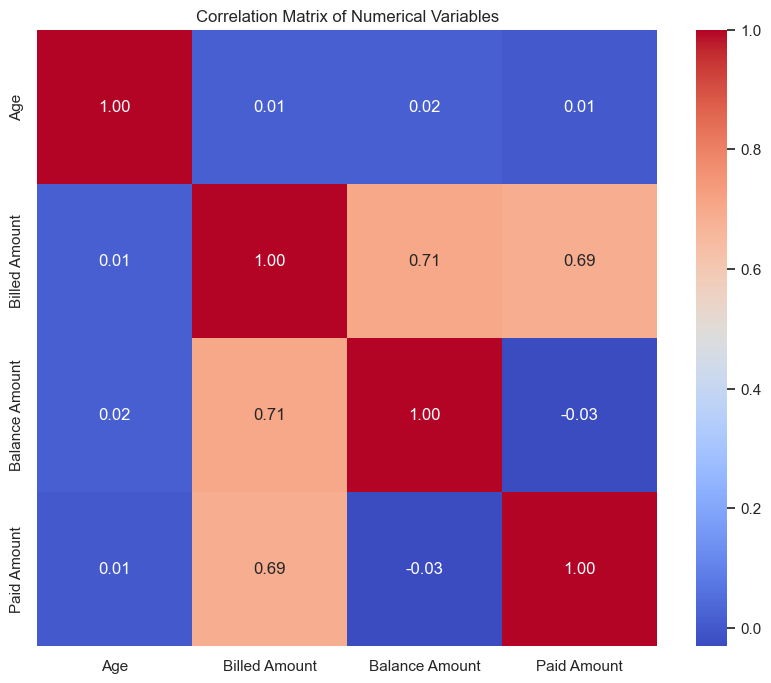

(DOB                    454
 Claim Submitted On    2215
 dtype: int64,
 "Flag records with missing DOB; Impute 'Claim Submitted On' with a placeholder or median date.")

In [11]:
# Quick re-preparation of the dataset
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['Age'] = pd.Timestamp('now').year - data['DOB'].dt.year
data['Billed Amount'] = data['Billed Amount'].replace('[\$,]', '', regex=True).astype(float)
data['Balance Amount'] = data['Balance Amount'].replace('[\$,]', '', regex=True).astype(float)
data['Paid Amount'] = data['Paid Amount'].replace('[\$,]', '', regex=True).astype(float)
data['DoS'] = pd.to_datetime(data['DoS'], errors='coerce')
data['Claim Submitted On'] = pd.to_datetime(data['Claim Submitted On'], errors='coerce')
data['Modifier'] = data['Modifier'].fillna('None')

# Step 13: EDA Multivariate Analysis - Correlation Analysis
numerical_data_for_correlation = data[['Age', 'Billed Amount', 'Balance Amount', 'Paid Amount']]
correlation_matrix = numerical_data_for_correlation.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Step 14: Impute Missing Values
# Count of missing values before imputation
missing_values_before = data[['DOB', 'Claim Submitted On']].isnull().sum()
imputation_approach = "Flag records with missing DOB; Impute 'Claim Submitted On' with a placeholder or median date."

missing_values_before, imputation_approach

### Multivariate Analysis - Correlation

The correlation matrix of the numerical variables shows the following:

- There is a moderate positive correlation between 'Billed Amount' and 'Balance Amount'. This suggests that higher billed amounts tend to have higher remaining balances.
- 'Paid Amount' has a weaker correlation with both 'Billed Amount' and 'Balance Amount', indicating that the amount paid does not increase proportionally with the billed or balance amounts.
- 'Age' shows a very weak correlation with the financial variables, implying that the age of the patient does not significantly affect the financial aspects of the claims.

### Imputing Missing Values

1. **DOB:** There are 454 missing values. Given the importance of 'Age', flagging these records might be a better approach than imputing, to avoid introducing inaccuracies.
2. **Claim Submitted On:** With 2,215 missing values, we could impute these with a placeholder value or use a statistical method like the median or mean date, depending on the analysis needs.

This approach ensures that the missing data is handled in a way that minimizes the impact on the overall analysis.